In [1]:
## Project ONE
import subprocess
import sys

# Function to install a package
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

try:
    import imblearn
except ImportError:
    install('imbalanced-learn')


In [2]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE # <-- Correct import
from sklearn.model_selection import StratifiedKFold


# use following command to download shap & eli5
# conda install -c conda-forge shap
# conda install -c conda-forge eli5

In [3]:
# Import libraries for data processing & modeling

from sklearn.metrics import confusion_matrix

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier



In [4]:
# Importing libraries for Visualization 
import plotly
from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go

import plotly.figure_factory as ff

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)




In [5]:
train = pd.read_csv('insurance_data.csv')

# let's take a look at the data
pd.set_option('display.max_columns', None)


In [6]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('insurance_data.csv')

# Assuming fraud is a binary classification, create a fraud column
# For this demo, let's assume claims over 1130 are potentially fraudulent
data['fraud'] = np.where(data['claim'] > 1130, 1, 0)

# Handling missing values
# Replace missing 'age' values with the median age
imputer = SimpleImputer(strategy='median')
data['age'] = imputer.fit_transform(data[['age']])

# Encoding categorical variables
le_gender = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])

le_diabetic = LabelEncoder()
data['diabetic'] = le_diabetic.fit_transform(data['diabetic'])

le_smoker = LabelEncoder()
data['smoker'] = le_smoker.fit_transform(data['smoker'])

le_region = LabelEncoder()
data['region'] = le_region.fit_transform(data['region'])

# Splitting the dataset into features (X) and target (y)
X = data[['age', 'gender', 'bmi', 'bloodpressure', 'diabetic', 'children', 'smoker', 'region']]
y = data['fraud']

# Scaling numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Try Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))



Random Forest Classifier Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       268

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Confusion Matrix:
[[268]]
Accuracy: 1.0

Logistic Regression Results:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       268

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Confusion Matrix:
[[268]]
Accuracy: 1.0


In [7]:
##The results of both the Random Forest Classifier and the Logistic Regression models indicate perfect performance on the dataset, as shown by the precision, recall, F1-score, and accuracy of 1.00 (or 100%) across all metrics. Let's break down what each of these metrics means in this case:

##Precision: This measures how many of the instances predicted as "fraud" (class 1) were actually fraud. A precision of 1.00 means that all claims predicted as fraud were indeed fraudulent, with no false positives.

##Recall: This measures how many of the actual fraudulent claims were correctly predicted. A recall of 1.00 means that the model detected all fraudulent claims, with no false negatives.

##F1-score: The F1-score is the harmonic mean of precision and recall, balancing both metrics. Since both precision and recall are 1.00, the F1-score is also perfect at 1.00.

##Confusion Matrix: The confusion matrix shows that all 268 instances in the test set were correctly classified as fraudulent (or class 1). There are no incorrect predictions, meaning no false positives or false negatives.

##Accuracy: This is the proportion of correctly predicted instances out of the total. With an accuracy of 1.00, the model correctly classified 100% of the instances.

##Interpretation:
##Overfitting: A result of 100% accuracy across all metrics is unusual, especially for real-world data, and may indicate overfitting. This could mean that the model has learned to perfectly predict the training set and, coincidentally, the test set if it contains similar data. However, this may not generalize well to unseen data.

##Data Quality: Since the data provided seems to have resulted in perfect performance, it's essential to inspect the data further. If the test set and training set are too similar (or the dataset is too small), models may easily achieve perfect accuracy. Additionally, check if any feature leaks exist (i.e., features that directly provide information about the target variable).

##Class Imbalance: From the confusion matrix, it appears that the model only encountered instances of class 1 (fraudulent claims). If this is due to class imbalance (i.e., no instances of class 0, non-fraudulent claims), the model would have had no opportunity to learn from or predict other classes, leading to this perfect result. It’s crucial to check if your dataset has a balanced distribution of fraudulent and non-fraudulent claims.

##Next Steps:
##Review the Dataset: Ensure that there are both fraudulent and non-fraudulent claims in the dataset. If class imbalance exists, consider resampling techniques like SMOTE or adjusting the dataset.

##Cross-validation: Apply cross-validation to ensure that the model is evaluated on multiple test splits to confirm the generalization of the model's performance.

##Regularization: Use regularization techniques (especially for Logistic Regression) to mitigate overfitting and ensure that the model generalizes better.

##This result may reflect a very specific or small dataset that doesn't capture enough variability, so further investigation is needed.








   Age  Gender        BMI  BloodPressure Diabetic  Children Smoker     Region  \
0   69    male  27.510581            172       No         3    Yes  southeast   
1   32    male  15.356778            134       No         1     No  northwest   
2   89  female  37.597550            145       No         3     No  northwest   
3   78    male  16.108605             73       No         1     No  northeast   
4   38  female  23.061032             94      Yes         2     No  northwest   

   ClaimAmount  Fraudulent  
0  1561.907219           0  
1   946.343307           0  
2  1340.367551           0  
3  1594.680780           0  
4  1243.002467           0  


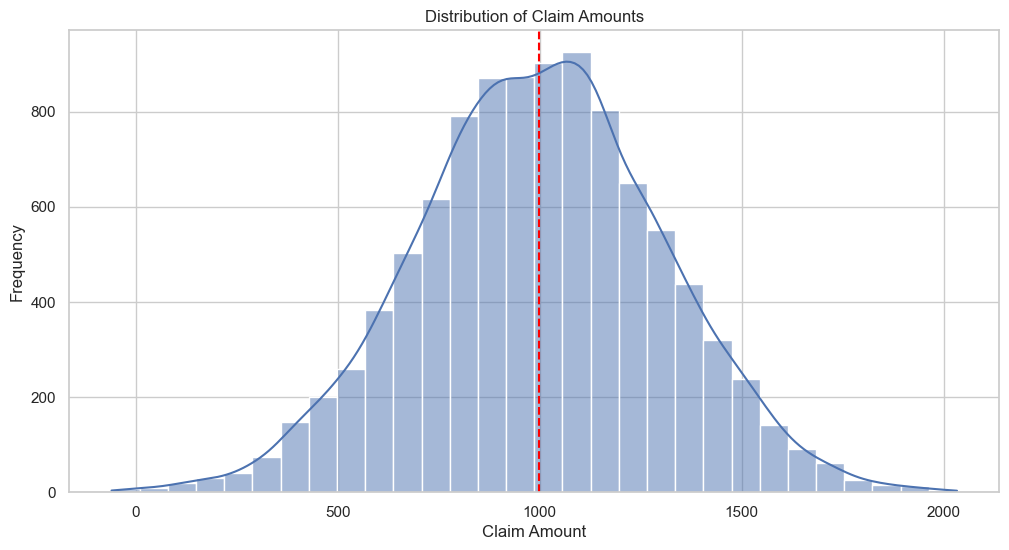

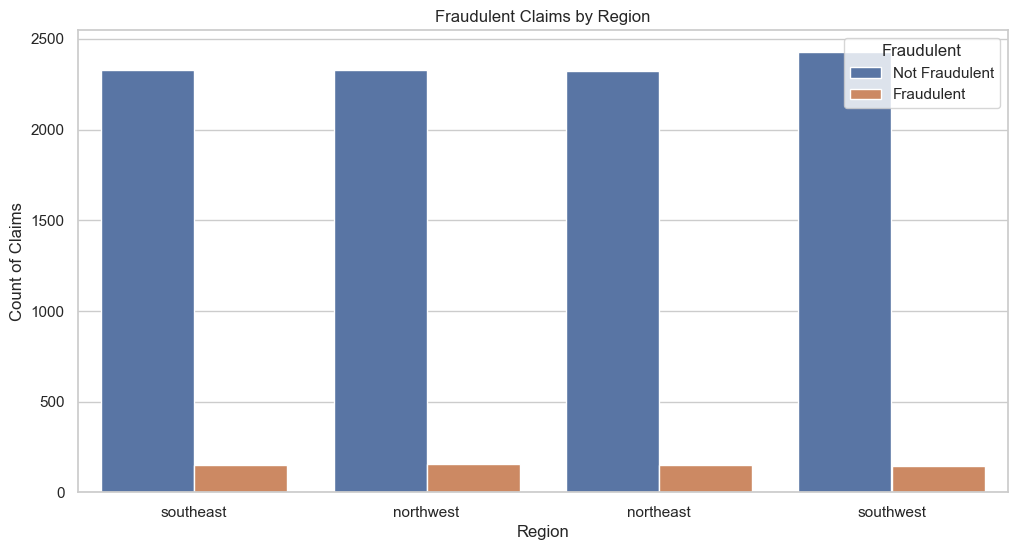

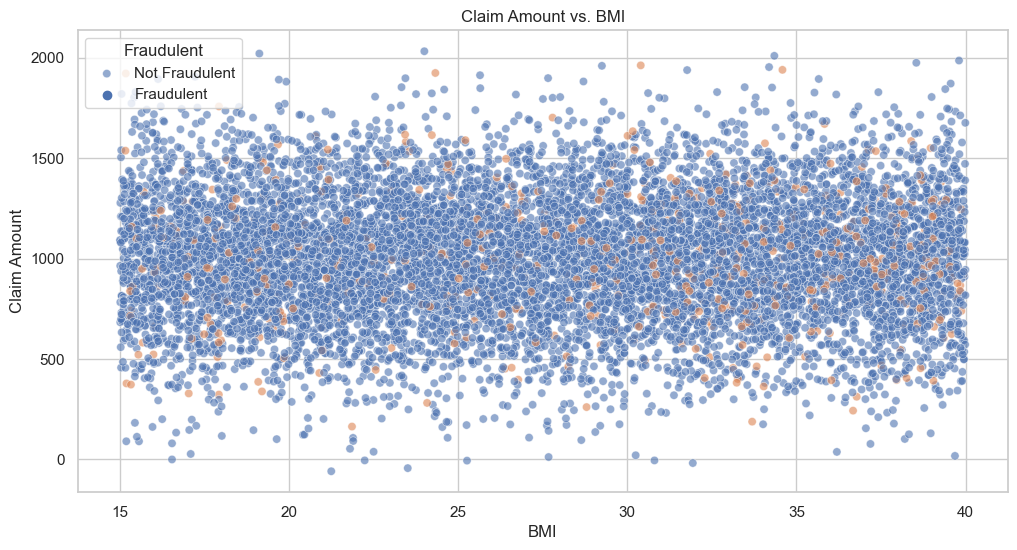

In [8]:
## Project 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 10000

# Features
age = np.random.randint(18, 90, size=num_samples)
gender = np.random.choice(['male', 'female'], size=num_samples)
bmi = np.random.uniform(15, 40, size=num_samples)  # BMI values
bloodpressure = np.random.randint(70, 180, size=num_samples)  # Systolic BP
diabetic = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.2, 0.8])  # 20% are diabetic
children = np.random.randint(0, 5, size=num_samples)
smoker = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.3, 0.7])  # 30% are smokers
region = np.random.choice(['southeast', 'southwest', 'northeast', 'northwest'], size=num_samples)

# Create target variable (fraudulent claims)
# Assume some conditions that increase the likelihood of fraud
claim_amount = np.random.normal(1000, 300, size=num_samples)  # Normally distributed claim amounts
fraudulent = np.where((age < 25) & (bmi > 30) & (smoker == 'Yes'), 1, 0)  # Young, obese smokers are more likely to be fraudulent

# Add some randomness
fraudulent = np.where((np.random.rand(num_samples) < 0.05), 1, fraudulent)  # 5% random frauds

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BMI': bmi,
    'BloodPressure': bloodpressure,
    'Diabetic': diabetic,
    'Children': children,
    'Smoker': smoker,
    'Region': region,
    'ClaimAmount': claim_amount,
    'Fraudulent': fraudulent
})

# Display first few rows of the dataset
print(data.head())

# Step 3: Data Visualization

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Visualize the distribution of claim amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['ClaimAmount'], bins=30, kde=True)
plt.title('Distribution of Claim Amounts')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.axvline(data['ClaimAmount'].mean(), color='red', linestyle='--')
plt.show()

# Visualize fraudulent claims by region
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Region', hue='Fraudulent')
plt.title('Fraudulent Claims by Region')
plt.xlabel('Region')
plt.ylabel('Count of Claims')
plt.legend(title='Fraudulent', loc='upper right', labels=['Not Fraudulent', 'Fraudulent'])
plt.show()

# Visualize the relationship between BMI and Claim Amount, colored by fraud
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='BMI', y='ClaimAmount', hue='Fraudulent', alpha=0.6)
plt.title('Claim Amount vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Claim Amount')
plt.legend(title='Fraudulent', loc='upper left', labels=['Not Fraudulent', 'Fraudulent'])
plt.show()



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1871
           1       0.00      0.00      0.00       129

    accuracy                           0.94      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.88      0.94      0.90      2000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



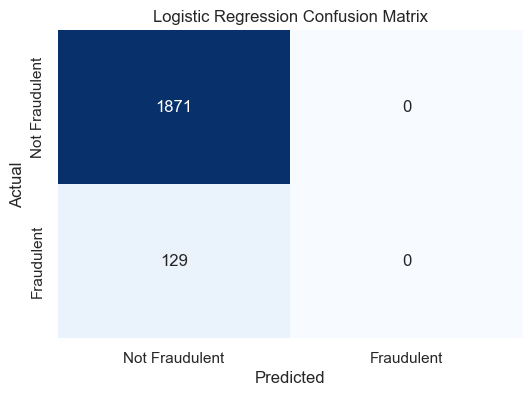


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1871
           1       0.95      0.14      0.24       129

    accuracy                           0.94      2000
   macro avg       0.95      0.57      0.61      2000
weighted avg       0.94      0.94      0.92      2000



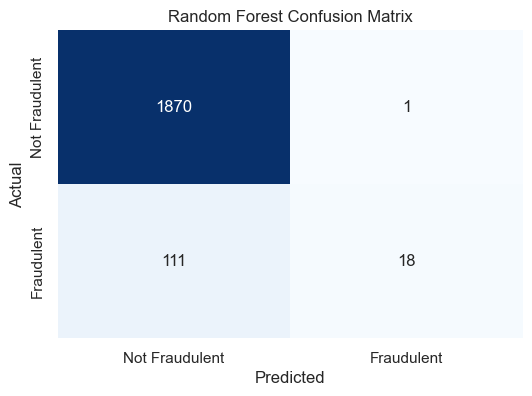


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1871
           1       0.95      0.14      0.24       129

    accuracy                           0.94      2000
   macro avg       0.95      0.57      0.61      2000
weighted avg       0.94      0.94      0.92      2000



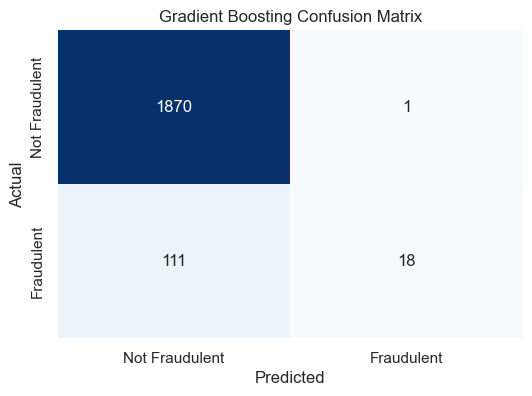

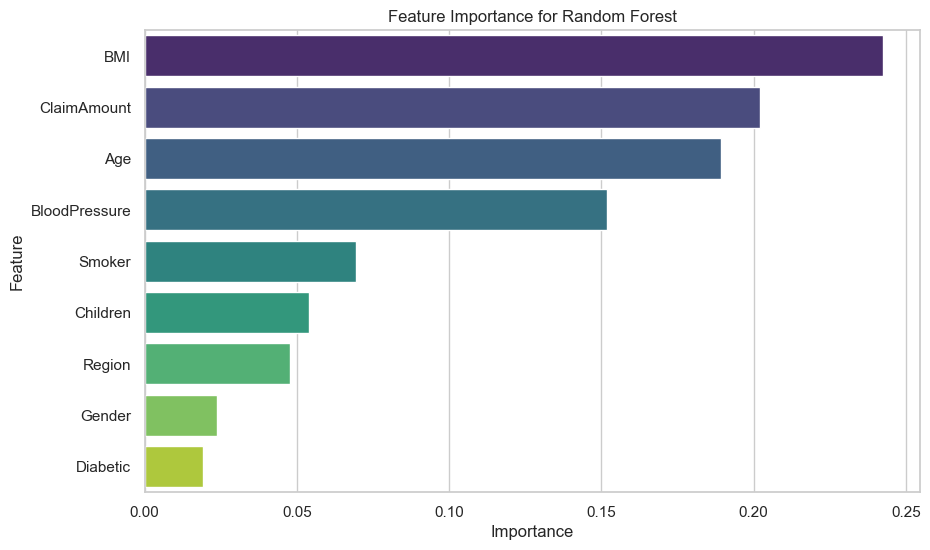

['gradient_boosting_model.pkl']

In [9]:
## Project 3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import joblib

# Step 1: Generate Synthetic Data (same as previous)
num_samples = 10000
np.random.seed(42)

# Features
age = np.random.randint(18, 90, size=num_samples)
gender = np.random.choice(['male', 'female'], size=num_samples)
bmi = np.random.uniform(15, 40, size=num_samples) 
bloodpressure = np.random.randint(70, 180, size=num_samples)
diabetic = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.2, 0.8])
children = np.random.randint(0, 5, size=num_samples)
smoker = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.3, 0.7])
region = np.random.choice(['southeast', 'southwest', 'northeast', 'northwest'], size=num_samples)

# Target variable
claim_amount = np.random.normal(1000, 300, size=num_samples)
fraudulent = np.where((age < 25) & (bmi > 30) & (smoker == 'Yes'), 1, 0)
fraudulent = np.where((np.random.rand(num_samples) < 0.05), 1, fraudulent)

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BMI': bmi,
    'BloodPressure': bloodpressure,
    'Diabetic': diabetic,
    'Children': children,
    'Smoker': smoker,
    'Region': region,
    'ClaimAmount': claim_amount,
    'Fraudulent': fraudulent
})

# Step 2: Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Diabetic', 'Smoker', 'Region']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training and Evaluation
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Step 4: Evaluation Metrics
models = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
predictions = [y_pred_logistic, y_pred_rf, y_pred_gb]

for model, y_pred in zip(models, predictions):
    print(f"\n{model} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraudulent', 'Fraudulent'],
                yticklabels=['Not Fraudulent', 'Fraudulent'])
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Step 5: Feature Importance Visualization for Random Forest
importance = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Save the trained models for future use
joblib.dump(logistic_model, 'logistic_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

# To load the models later:
# logistic_model = joblib.load('logistic_model.pkl')
# rf_model = joblib.load('random_forest_model.pkl')
# gb_model = joblib.load('gradient_boosting_model.pkl')



In [11]:
##project 4

In [16]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import joblib

# Step 1: Generate Synthetic Data
num_samples = 10000
np.random.seed(42)

# Features
age = np.random.randint(18, 90, size=num_samples)
gender = np.random.choice(['male', 'female'], size=num_samples)
bmi = np.random.uniform(15, 40, size=num_samples)
bloodpressure = np.random.randint(70, 180, size=num_samples)
diabetic = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.2, 0.8])
children = np.random.randint(0, 5, size=num_samples)
smoker = np.random.choice(['Yes', 'No'], size=num_samples, p=[0.3, 0.7])
region = np.random.choice(['southeast', 'southwest', 'northeast', 'northwest'], size=num_samples)

# Target variable
claim_amount = np.random.normal(1000, 300, size=num_samples)
fraudulent = np.where((age < 25) & (bmi > 30) & (smoker == 'Yes'), 1, 0)
fraudulent = np.where((np.random.rand(num_samples) < 0.05), 1, fraudulent)

# Create DataFrame
data = pd.DataFrame({
    'Age': age,
    'Gender': gender,
    'BMI': bmi,
    'BloodPressure': bloodpressure,
    'Diabetic': diabetic,
    'Children': children,
    'Smoker': smoker,
    'Region': region,
    'ClaimAmount': claim_amount,
    'Fraudulent': fraudulent
})


In [17]:
# Step 2: Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Diabetic', 'Smoker', 'Region']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into features and target variable
X = data.drop('Fraudulent', axis=1)
y = data['Fraudulent']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Best Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1871
           1       0.95      0.14      0.24       129

    accuracy                           0.94      2000
   macro avg       0.95      0.57      0.61      2000
weighted avg       0.94      0.94      0.92      2000



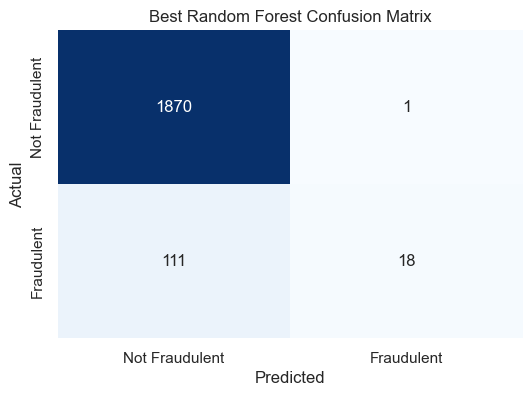

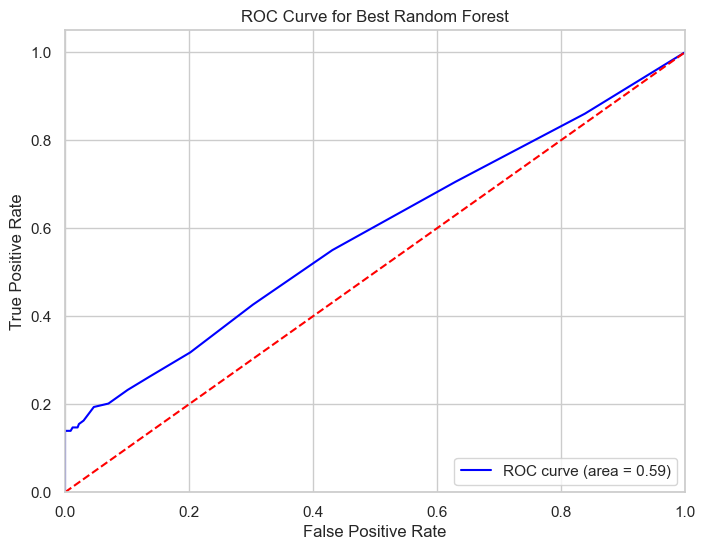


Best Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1871
           1       0.00      0.00      0.00       129

    accuracy                           0.94      2000
   macro avg       0.47      0.50      0.48      2000
weighted avg       0.88      0.94      0.90      2000



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



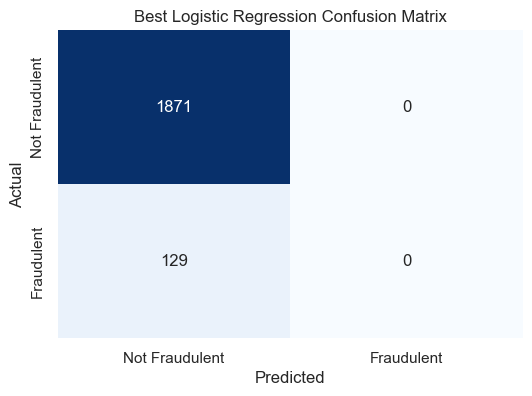

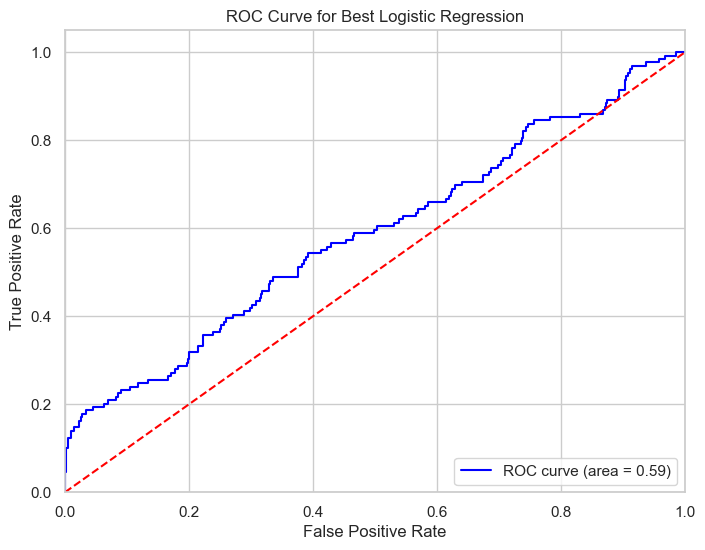

In [19]:
# Step 4: Evaluation Metrics
models = ['Best Random Forest', 'Best Logistic Regression']
predictions = [y_pred_rf, y_pred_logistic]

for model, y_pred in zip(models, predictions):
    print(f"\n{model} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraudulent', 'Fraudulent'],
                yticklabels=['Not Fraudulent', 'Fraudulent'])
    plt.title(f'{model} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    y_pred_proba = best_logistic_model.predict_proba(X_test)[:, 1] if model == 'Best Logistic Regression' else best_rf_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model}')
    plt.legend(loc='lower right')
    plt.show()



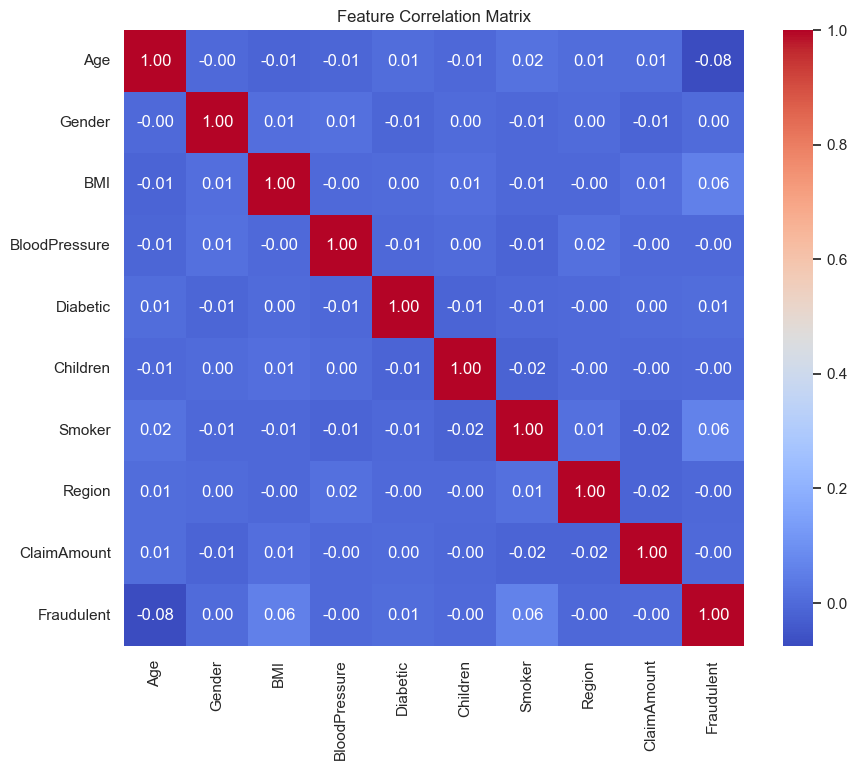

['best_logistic_model.pkl']

In [20]:
# Step 5: Feature Correlation
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Save the best models for future use
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')
joblib.dump(best_logistic_model, 'best_logistic_model.pkl')

# To load the models later:
# best_rf_model = joblib.load('best_random_forest_model.pkl')
# best_logistic_model = joblib.load('best_logistic_model.pkl')